# Importing Libraries and Reading the Dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My data files/KaggleV2-May-2016.csv')


Drop useless column of PatientID and AppointmentiD

In [ ]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)


## Exploring Dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [ ]:
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
print("Number of records (patients): ", df.shape[0])
print("Number of columns (features): ", df.shape[1])

Number of records (patients):  110527
Number of columns (features):  12


In [ ]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

# Dataset Cleaning

Correcting Datetime format

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

Renaming Column names


In [ ]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived'})


Creating New Column Presence and droppong No-Show

In [ ]:
df['Presence'] = df['No-show'].apply(lambda x: 'Present' if x == "No" else 'Absent')
df = df.drop('No-show', 1)

Replacing Weekdays by Numerical values

In [ ]:
df['WeekDay'] = df['AppointmentDay'].apply(lambda x: x.weekday())
replace_map = {'WeekDay': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}}
df.replace(replace_map, inplace=True)

In [ ]:

df['Month'] = df['AppointmentDay'].dt.month_name()
df['Hour'] = df['ScheduledDay'].dt.hour

Checking Missing Values

In [ ]:
df.isnull().sum()


Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
Presence          0
WeekDay           0
Month             0
Hour              0
dtype: int64

In [ ]:
df['ScheduledDay'].value_counts(dropna=False)


2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-09       1
2015-11-10       1
2016-01-19       1
2016-06-04       1
2016-03-19       1
Name: ScheduledDay, Length: 111, dtype: int64

Checking Unique Values in Categorical Columns

In [ ]:
print("Unique Values in 'Gender'", list(df.Gender.unique()))
print("Unique Values in 'Scholarship'", list(df.Scholarship.unique()))
print("Unique Values in 'Hypertension'", list(df.Hypertension.unique()))
print("Unique Values in 'Diabetes'", list(df.Diabetes.unique()))
print("Unique Values in 'Alcoholism'", list(df.Alcoholism.unique()))
print("Unique Values in 'Handicap'", list(df.Handicap.unique()))
print("Unique Values in 'SMSReceived'", list(df.SMSReceived.unique()))

Unique Values in 'Gender' ['F', 'M']
Unique Values in 'Scholarship' [0, 1]
Unique Values in 'Hypertension' [1, 0]
Unique Values in 'Diabetes' [0, 1]
Unique Values in 'Alcoholism' [0, 1]
Unique Values in 'Handicap' [0, 1, 2, 3, 4]
Unique Values in 'SMSReceived' [0, 1]


In [ ]:
df.describe()


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Hour
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.0
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0


# EDA

In [ ]:
labels = df['Gender'].value_counts().index
values = df['Gender'].value_counts().values

colors = ['orange', 'green']

fig = {'data' : [{'type' : 'pie',
                  'name' : "Patients by Gender: Pie chart",
                 'labels' : df['Gender'].value_counts().index,
                 'values' : df['Gender'].value_counts().values,
                 'direction' : 'clockwise',
                 'marker' : {'colors' : ['orange', 'green']}}], 'layout' : {'title' : 'Patients by Gender'}}

pyo.iplot(fig)

In [ ]:
colors = ['#eba796', '#96ebda']


fig = {'data' : [{'type' : 'pie',
                  'name' : "Present vs Absent on Appointment Date",
                 'labels' : df['Presence'].value_counts().index,
                 'values' : df['Presence'].value_counts().values,
                 'direction' : 'clockwise',
                 'marker' : {'colors' : ['aqua', 'magenta']}}], 'layout' : {'title' : 'Present vs Absent on Appointment Date'}}

pyo.iplot(fig)

In [ ]:
x0 = df.Age.values

trace0 = go.Box(x=x0, name = 'Age',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    ))
data = [trace0]
pyo.iplot(data)

In [ ]:
# Create variable with True if a patient is present
present = df['Presence'] == "Present"

# Select all cases where a patient is present
df_present_patients = df[present]
absent = df['Presence'] == "Absent"

# Select all cases where a patient is present
df_absent_patients = df[absent]

x1 = df_present_patients.Age.values

x2 = df_absent_patients.Age.values
trace0 = go.Box(
    name="Present",
    x=x1,
    marker=dict(
        color='blue'
    )
)
trace1 = go.Box(
    name="Absent",
    x=x2,
    marker=dict(
        color='red'
    )
)
data = [trace0, trace1]

layout = go.Layout(
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [ ]:
female = df['Gender'] == "F"
male = df['Gender'] == "M"

# Select all cases where a patient is present
df_female_patients = df[female] 

df_male_patients = df[male] 

x3 = df_female_patients.Age.values

x4 = df_male_patients.Age.values

trace2 = go.Box(
    name="Female",
    x=x3,
    marker=dict(
        color='#3D9970'
    )
)
trace3 = go.Box(
    name="Male",
    x=x4,
    marker=dict(
        color='#FF4136'
    )
)

data = [trace2, trace3]

layout = go.Layout(
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [ ]:
trace5 = go.Bar(
    x=df_present_patients['Gender'].value_counts().index,
    y=df_present_patients['Gender'].value_counts().values,
    name='Present'
   
)
trace6 = go.Bar(
    x=df_absent_patients['Gender'].value_counts().index,
    y=df_absent_patients['Gender'].value_counts().values,
    name='Absent'
)

data = [trace5, trace6]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='grouped-bar')

In [ ]:
trace7 = go.Bar(
    x=df_present_patients['WeekDay'].value_counts().index,
    y=df_present_patients['WeekDay'].value_counts().values,
    name='Present'
)

data = [trace7]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='grouped-bar')

# Data Manipulation

In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,WeekDay,Month,Hour
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,Friday,April,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,Friday,April,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,Friday,April,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,Friday,April,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,Friday,April,0


In [ ]:
#Renaming the Presence column as Output_label 
df = df.rename(columns={"Presence": "OUTPUT_LABEL"})

df.OUTPUT_LABEL = df.OUTPUT_LABEL.map({ 'Present': 0, 'Absent': 1 })

In [ ]:
df.head(9)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,OUTPUT_LABEL,WeekDay,Month,Hour,num_days,Gender_M,Handicap_1,Handicap_2,Handicap_3,Handicap_4,week
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,April,0,0,0,0,0,0,0,17
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,April,0,0,1,0,0,0,0,17
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,April,0,0,0,0,0,0,0,17
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,April,0,0,0,0,0,0,0,17
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,April,0,0,0,0,0,0,0,17
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,Friday,April,0,2,0,0,0,0,0,17
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Friday,April,0,2,0,0,0,0,0,17
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Friday,April,0,2,0,0,0,0,0,17
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,Friday,April,0,0,0,0,0,0,0,17


In [ ]:
df[['OUTPUT_LABEL']].head(10)

,OUTPUT_LABEL
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [ ]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [ ]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.202


Removing Age value less than Zero

In [ ]:
df = df[~(df['Age'] < 1)]    
df.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [ ]:
#Change to the date format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format='%Y-%m-%d %H:%M:%S')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format='%Y-%m-%d %H:%M:%S')
df['num_days'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days
df.num_days.head(10)

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    2
8    0
9    2
Name: num_days, dtype: int64

# Treating Categorical Features

In [ ]:
cols_cat = ['Gender']

In [ ]:
pd.get_dummies(df[cols_cat]).head()

,Gender_F,Gender_M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


Handcap is one of the feature which says whether the patient is handicapped or not. If patient is handicapped, till what degree(0,1,2,3,4)

In [ ]:
df.Handicap.describe()

count    106987.000000
mean          0.022975
std           0.164115
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handicap, dtype: float64

In [ ]:
cols_cat_num = ['Handicap']

In [ ]:
df[cols_cat_num] = df[cols_cat_num].astype('str')
pd.get_dummies(df[cols_cat_num],drop_first = False).head()

,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [ ]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num],drop_first = True)

In [ ]:
df_cat.head()

,Gender_M,Handicap_1,Handicap_2,Handicap_3,Handicap_4
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


Joining all the categorical variables and saving them

In [ ]:
df = pd.concat([df,df_cat], axis = 1)
cols_all_cat = list(df_cat.columns)

In [ ]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,OUTPUT_LABEL,WeekDay,Month,Hour,num_days,Gender_M,Handicap_1,Handicap_2,Handicap_3,Handicap_4
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,April,0,0,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,April,0,0,1,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,April,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,April,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,April,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday,June,0,35,0,0,0,0,0
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday,June,0,35,0,0,0,0,0
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday,June,0,41,0,0,0,0,0
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday,June,0,41,0,0,0,0,0


In [ ]:
cols_num = ['Scholarship','Hypertension', 'Diabetes', 'Alcoholism',
       'SMSReceived', 'Age', 'num_days', 'WeekDay', 'Month','week']

In [ ]:
df["week"] = df["ScheduledDay"].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))


Total number of features: 15
Numerical Features: 10
Categorical Features: 5


Make a new dataframe that only has the columns of interest

In [ ]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [ ]:
df_data.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,Age,num_days,WeekDay,Month,week,Gender_M,Handicap_1,Handicap_2,Handicap_3,Handicap_4,OUTPUT_LABEL
0,0,1,0,0,0,62,0,Friday,April,17,0,0,0,0,0,0
1,0,0,0,0,0,56,0,Friday,April,17,1,0,0,0,0,0
2,0,0,0,0,0,62,0,Friday,April,17,0,0,0,0,0,0
3,0,0,0,0,0,8,0,Friday,April,17,0,0,0,0,0,0
4,0,1,1,0,0,56,0,Friday,April,17,0,0,0,0,0,0


# Splitting Data into Training/Testing/Validation

In [ ]:
df_data.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,Age,num_days,WeekDay,Month,week,Gender_M,Handicap_1,Handicap_2,Handicap_3,Handicap_4,OUTPUT_LABEL
0,0,1,0,0,0,62,0,Friday,April,17,0,0,0,0,0,0
1,0,0,0,0,0,56,0,Friday,April,17,1,0,0,0,0,0
2,0,0,0,0,0,62,0,Friday,April,17,0,0,0,0,0,0
3,0,0,0,0,0,8,0,Friday,April,17,0,0,0,0,0,0
4,0,1,1,0,0,56,0,Friday,April,17,0,0,0,0,0,0


In [ ]:
replace_map = {'WeekDay': {'Monday':0,'Tuesday':1,  'Wednesday':2, 'Thursday':3,  'Friday':4, 'Saturday':5}}
df_data.replace(replace_map, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_data['Month'].unique()

array(['April', 'May', 'June'], dtype=object)

In [ ]:
replace_map = {'Month': {'May':5,'April':4,  'June':6}}
df_data.replace(replace_map, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_data

,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,Age,num_days,WeekDay,Month,week,Gender_M,Handicap_1,Handicap_2,Handicap_3,Handicap_4,OUTPUT_LABEL
0,0,1,0,0,0,62,0,4,4,17,0,0,0,0,0,0
1,0,0,0,0,0,56,0,4,4,17,1,0,0,0,0,0
2,0,0,0,0,0,62,0,4,4,17,0,0,0,0,0,0
3,0,0,0,0,0,8,0,4,4,17,0,0,0,0,0,0
4,0,1,1,0,0,56,0,4,4,17,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,1,56,35,1,6,18,0,0,0,0,0,0
110523,0,0,0,0,1,51,35,1,6,18,0,0,0,0,0,0
110524,0,0,0,0,1,21,41,1,6,17,0,0,0,0,0,0
110525,0,0,0,0,1,38,41,1,6,17,0,0,0,0,0,0


Shuffling the Data

In [ ]:
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

Save 30% of the data as validation and test data 

In [ ]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


Split into test and validation using 50% fraction

In [ ]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [ ]:
df_train_all=df_data.drop(df_valid_test.index)

In [ ]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 16048):0.206
Valid prevalence(n = 16048):0.206
Train all prevalence(n = 74891):0.201


Balancing the Dataset

In [ ]:
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

# merge the balanced data
df_train = pd.concat([df_train_pos.sample(n = n, random_state = 42), 
                      df_train_neg.sample(n = n, random_state = 42)],axis = 0, 
                     ignore_index = True)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 30140):0.500


Save all 4 dataframes to csv and the cols_input

In [ ]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [ ]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Filling any missing values with the mean value

In [ ]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [ ]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [ ]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,Scholarship,0.101467
2,Hypertension,0.204123
3,Diabetes,0.074468
4,Alcoholism,0.031045


In [ ]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (74891, 15)
Training shapes: (30140, 15) (30140,)
Validation shapes: (16048, 15) (16048,)


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [ ]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [ ]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive.

In [ ]:
thresh = 0.5

## Model Selection: baseline models

K-NN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.707
accuracy:0.653
recall:0.653
precision:0.653
specificity:0.637
prevalence:0.500
 
Validation:
AUC:0.693
accuracy:0.646
recall:0.636
precision:0.319
specificity:0.634
prevalence:0.206
 


We have AUC of 0.733 that catches 81.3% of the no show appointments when we used threshold of 0.5

Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.645
accuracy:0.500
recall:0.002
precision:0.667
specificity:0.999
prevalence:0.500
 
Validation:
AUC:0.642
accuracy:0.794
recall:0.001
precision:0.211
specificity:0.999
prevalence:0.206
 


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.773
accuracy:0.699
recall:0.799
precision:0.665
specificity:0.586
prevalence:0.500
 
Validation:
AUC:0.715
accuracy:0.608
recall:0.758
precision:0.313
specificity:0.560
prevalence:0.206
 


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.735
accuracy:0.678
recall:0.848
precision:0.633
specificity:0.509
prevalence:0.500
 
Validation:
AUC:0.730
accuracy:0.581
recall:0.843
precision:0.310
specificity:0.513
prevalence:0.206
 


Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.768
accuracy:0.701
recall:0.807
precision:0.665
specificity:0.594
prevalence:0.500
 
Validation:
AUC:0.731
accuracy:0.611
recall:0.776
precision:0.318
specificity:0.568
prevalence:0.206
 


## Analyzing Results

In [ ]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*5,
                          'auc':[knn_train_auc, knn_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

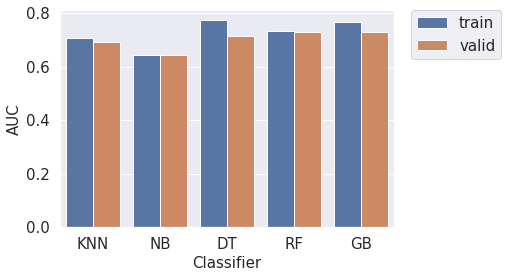

In [ ]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

Best model is: Random Forest

Selecting the current best model as Random Forest Classifier as it gives AUC of 0.732 for training and 0.711 for test data.

# Hyperparameter Tuning

In [ ]:
import time

my_params = [2,4,6,8,10]# fill this in your list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    for i in my_params:
    # fit model
     model= RandomForestClassifier(max_depth = i)                                
     model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

2 5.987520456314087
4 5.723525524139404
6 5.7599098682403564
8 5.76572322845459
10 5.829967260360718


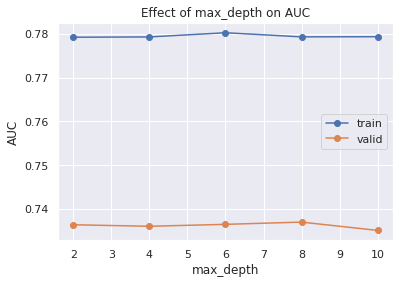

In [ ]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('max_depth') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of max_depth on AUC') # fill this in
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

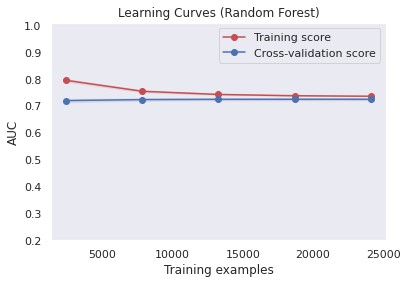

In [ ]:
title = "Learning Curves (Random Forest)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)                                       # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
num_days,0.612781
week,0.171194
SMSReceived,0.092831
Age,0.072755
Month,0.012893


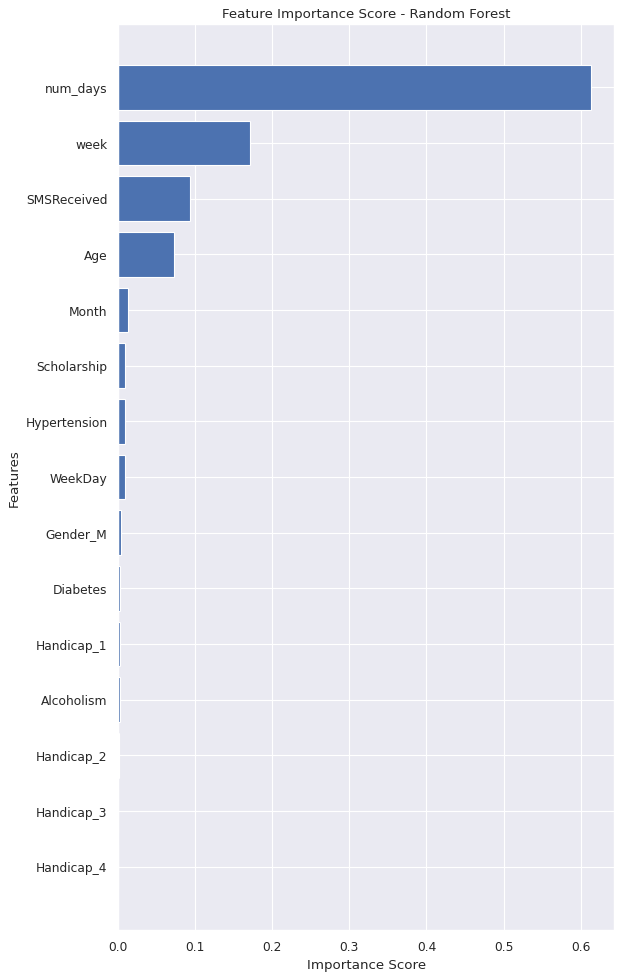

In [ ]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [ ]:
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [ ]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.7min finished


229.58269238471985


In [ ]:
rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.735
Validation AUC:0.730
Optimized Random Forest
Training AUC:0.752
Validation AUC:0.734
